# Exploratory data analysis and visualization of Coursera Course data set

### Tasks:
- Download the data from Kaggle.
- Load the data using Pandas.
- Perform data cleaning by:
  - Handling missing values.
  - Removing duplicate samples and features.
  - Treating the outliers.
- Perform exploratory data analysis. Your analysis should provide answers to these questions:
  - How many observations are there in this dataset?
  - How many features this dataset has?
  - Which of the features are categorical?
  - 
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, the results you got, and what these results mean.
- Provide suggestions for how your analysis could be improved.


### Installing necessary packages

In [157]:

#!pip install pipreqs
#!pip install -r requirements.txt




### Importing libraries

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



#import os; print(os.getcwd())
#!pipreqs c:\Users\blockchain\Documents\turing_college
#!jupyter nbconvert --to script *.ipynb
#!pipreqs .

### Loading data from Kaggle

In [159]:
# An alternative way to download datasets from kaggle
# For this you have to install: pip install kaggle 
# Create API token ~\.kaggle\kaggle.json

import kaggle
kaggle.api.authenticate()
kaggle.api.dataset_download_files('siddharthm1698/coursera-course-dataset', path= '.', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/siddharthm1698/coursera-course-dataset


In [160]:
df = pd.read_csv('coursea_data.csv', index_col=0).sort_index()
df

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled
0,IBM Data Science,IBM,PROFESSIONAL CERTIFICATE,4.6,Beginner,480k
1,Introduction to Data Science,IBM,SPECIALIZATION,4.6,Beginner,310k
2,The Science of Well-Being,Yale University,COURSE,4.9,Mixed,2.5m
3,Python for Everybody,University of Michigan,SPECIALIZATION,4.8,Beginner,1.5m
4,Google IT Support,Google,PROFESSIONAL CERTIFICATE,4.8,Beginner,350k
...,...,...,...,...,...,...
886,Understanding Modern Finance,American Institute of Business and Economics,SPECIALIZATION,4.4,Intermediate,11k
887,Object-Oriented Design,University of Alberta,COURSE,4.7,Intermediate,33k
888,Aprende a programar con Python,Universidad Austral,SPECIALIZATION,4.2,Beginner,6.6k
889,Погружение в Python,Moscow Institute of Physics and Technology,COURSE,4.7,Intermediate,45k


### Data cleaning

In [161]:
df['course_students_enrolled'] = (
    df['course_students_enrolled']
    .str.replace('k', '*1_000')
    .str.replace('m', '*1_000_000')
    .map(eval)
)


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   course_title              891 non-null    object 
 1   course_organization       891 non-null    object 
 2   course_Certificate_type   891 non-null    object 
 3   course_rating             891 non-null    float64
 4   course_difficulty         891 non-null    object 
 5   course_students_enrolled  891 non-null    float64
dtypes: float64(2), object(4)
memory usage: 48.7+ KB


No NaNs were found, so no actions were required.

In [163]:
df.describe().map(
    lambda x: '{:,.2f}'.format(x).rstrip('0').rstrip('.')
)

,course_rating,course_students_enrolled
count,891,891
mean,4.68,"90,552.08"
std,0.16,"181,936.45"
min,3.3,"1,500"
25%,4.6,"17,500"
50%,4.7,"42,000"
75%,4.8,"99,500"
max,5,"3,200,000"


### Removing duplicated samples and features

In [164]:

duplicate_rows = df[df.duplicated()]
duplicate_rows

,course_title,course_organization,course_Certificate_type,course_rating,course_difficulty,course_students_enrolled



No duplicated rows were found, so no actions were required.

In [165]:
del duplicate_rows

In [166]:
duplicate_columns = df.columns[df.columns.duplicated()]
duplicate_columns

Index([], dtype='object')


No duplicated columns were found, so no actions were required.

In [167]:
del duplicate_columns

### Treating outliers

In [168]:
numerical_features = df.select_dtypes(include=[np.number]).columns

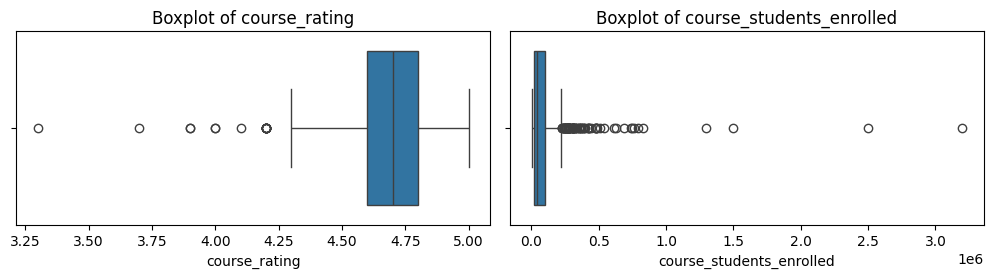

In [169]:
# Visualize the distribution of numerical features to identify outliers
numerical_features = df.select_dtypes(include=[np.number]).columns

# Plot boxplots for numerical features in a grid view
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

Outliers were identified using a boxplot, which displays data distribution and highlights potential anomalies. Despite finding outliers in several columns, they were not removed due to a lack of domain knowledge and to avoid introducing NaNs or deleting rows, which could disrupt upcoming Exploratory Data Analysis (EDA). Thus, outliers were retained to maintain data integrity and ensure a comprehensive analysis.

### Removing ouliers (Optional, not recommended)

In [170]:
'''
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define a condition to identify outliers
outlier_condition = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers
df_cleaned = df[~outlier_condition]

# Display the first few rows of the dataframe after removing outliers
df_cleaned.head()
'''

'\n# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each numerical feature\nQ1 = df[numerical_features].quantile(0.25)\nQ3 = df[numerical_features].quantile(0.75)\nIQR = Q3 - Q1\n\n# Define a condition to identify outliers\noutlier_condition = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)\n\n# Remove outliers\ndf_cleaned = df[~outlier_condition]\n\n# Display the first few rows of the dataframe after removing outliers\ndf_cleaned.head()\n'

### How many observations are there in this dataset?

In [171]:
num_observations = df.shape[0]
print(f'The dataset contains {num_observations} observations.')

The dataset contains 891 observations.


### How many features this dataset has?

In [172]:
num_features = df.shape[1]
print(f'The dataset contains {num_features} features.')

The dataset contains 6 features.


### Which of the features are categorical?

In [173]:
# Identify categorical features
object_columns = df.select_dtypes(include=['object']).columns
# Manually filter out columns that are not categorical
categorical_columns = [col for col in object_columns if col not in ['course_title']]
categorical_columns

['course_organization', 'course_Certificate_type', 'course_difficulty']

Categorical variables typically represent data that can be divided into specific categories or groups. In this DataFrame, ['course_organization', 'course_Certificate_type', 'course_difficulty'] is a clear example of a categorical variable because it represents distinct categories of music.

On the other hand, course title are technically of type ‘object’, but they don’t represent categories in the same way. They are unique names and are not meant to be grouped into categories.

# EDA

To get a better understanding of the distribution of the data we use **histograms** to visualize the distribution of the course_rating and course_students_enrolled columns:

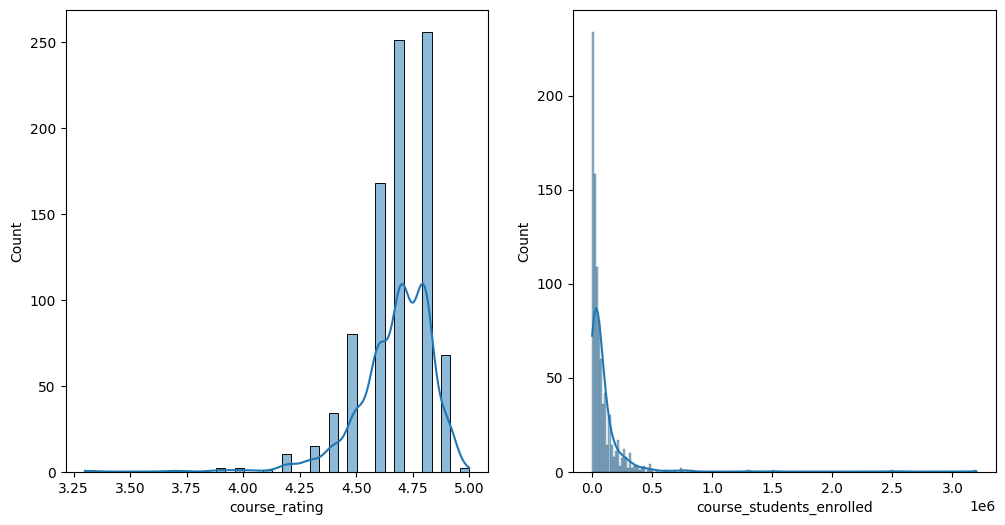

In [174]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="course_rating", kde=True)
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="course_students_enrolled", kde=True)
plt.show()

**Scatter Plot:** To visualize the relationship between course_rating and course_students_enrolled:

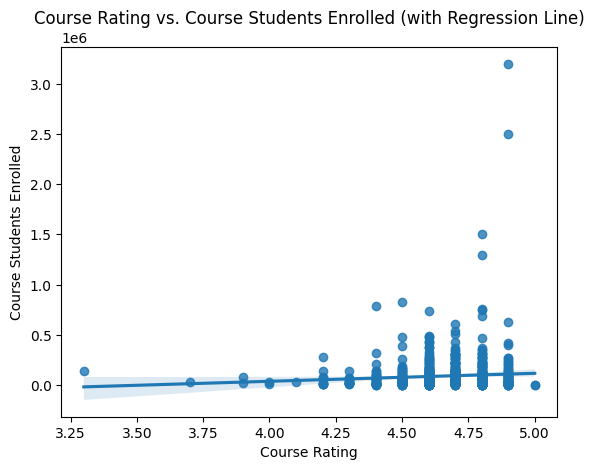

In [175]:
sns.regplot(x="course_rating", y="course_students_enrolled", data=df)
plt.xlabel("Course Rating")
plt.ylabel("Course Students Enrolled")
plt.title("Course Rating vs. Course Students Enrolled (with Regression Line)");

**Scatter Plot Matrix** for the numerical variables

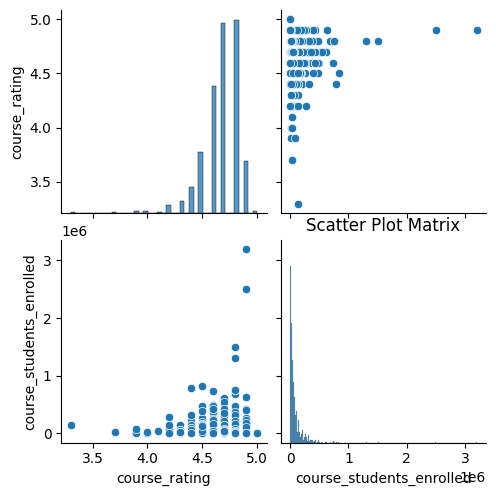

In [181]:
sns.pairplot(df[["course_rating", "course_students_enrolled"]])
plt.title("Scatter Plot Matrix");

To understand the relationships between the variables, let's calculate the **correlation matrix:**

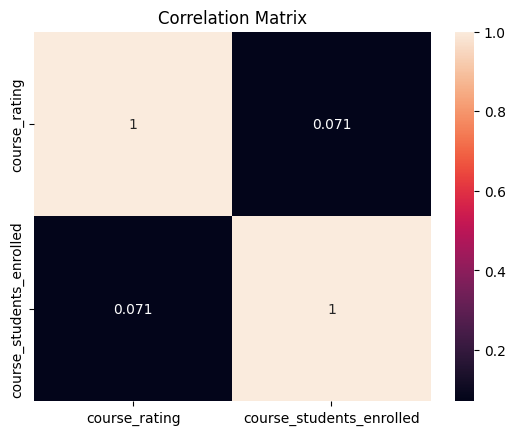

In [176]:
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.title("Correlation Matrix");

**Boxplot** for Course Rating by Difficulty

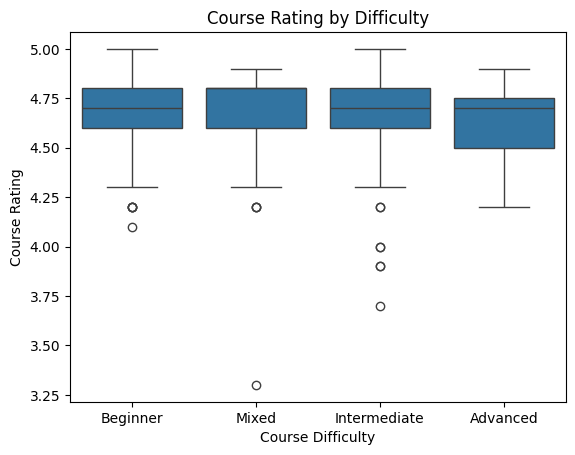

In [180]:
sns.boxplot(data=df, x="course_difficulty", y="course_rating")
plt.title("Course Rating by Difficulty")
plt.xlabel("Course Difficulty")
plt.ylabel("Course Rating");

**Bar Plot:** To visualize the distribution of course_difficulty and Course Organization (Discrete variables):

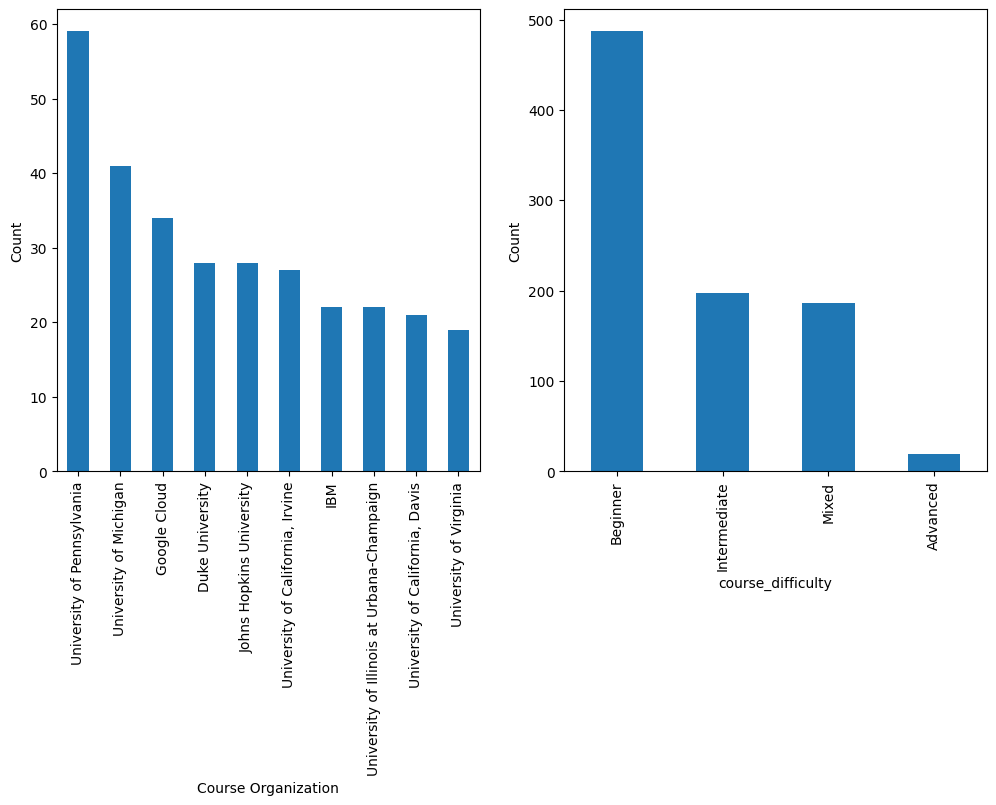

In [178]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df["course_organization"].value_counts().head(10).plot(kind="bar")
plt.xlabel("Course Organization")
plt.ylabel("Count")
plt.subplot(1, 2, 2)
df["course_difficulty"].value_counts().plot(kind="bar")
plt.xlabel("course_difficulty")
plt.ylabel("Count");

**Pie Chart** for Course Certificate Types

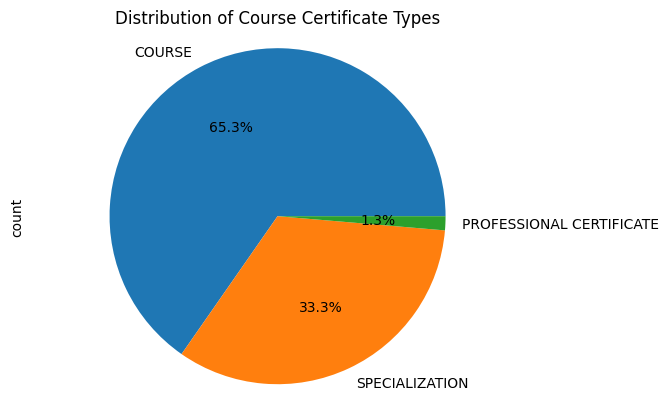

In [179]:
df["course_Certificate_type"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.title("Distribution of Course Certificate Types")
plt.axis("equal");

**Heatmap** for Course Difficulty by Organization

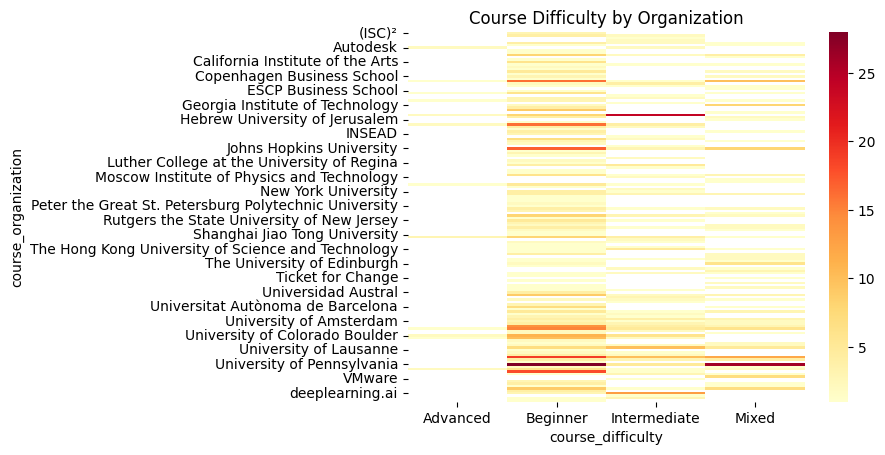

In [182]:
pivot_table = pd.pivot_table(df,
                             index="course_organization", 
                             columns="course_difficulty", 
                             aggfunc="size")
sns.heatmap(pivot_table, cmap="YlOrRd")
plt.title("Course Difficulty by Organization");

**Stacked Bar Plot** for Course Certificate Types by Organization (Top-10)

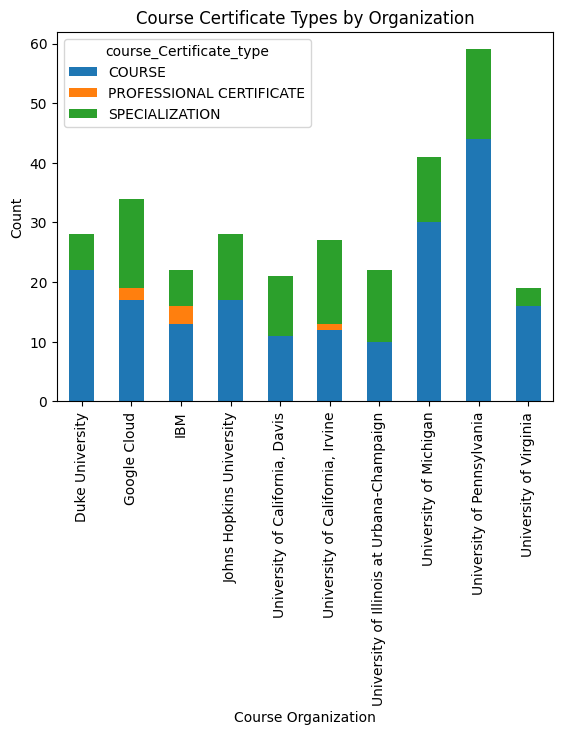

In [183]:
df_top_10 = df[
    df['course_organization'].isin(
        df['course_organization'].value_counts().nlargest(10).index)]

pivot_table = pd.pivot_table(df_top_10, 
                             index="course_organization", 
                             columns="course_Certificate_type", 
                             values="course_title", 
                             aggfunc="count")
pivot_table.plot(kind="bar", stacked=True)
plt.title("Course Certificate Types by Organization")
plt.xlabel("Course Organization")
plt.ylabel("Count");

**Violin Plot** for Course Rating by Certificate Type

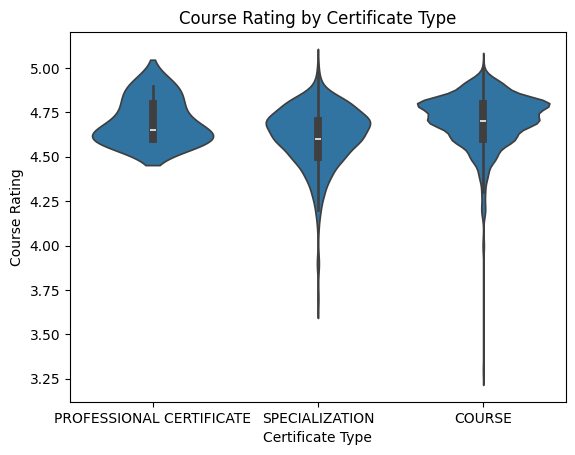

In [184]:
sns.violinplot(data=df, x="course_Certificate_type", y="course_rating")
plt.title("Course Rating by Certificate Type")
plt.xlabel("Certificate Type")
plt.ylabel("Course Rating");

**Treemap** for Course Difficulty by Organization

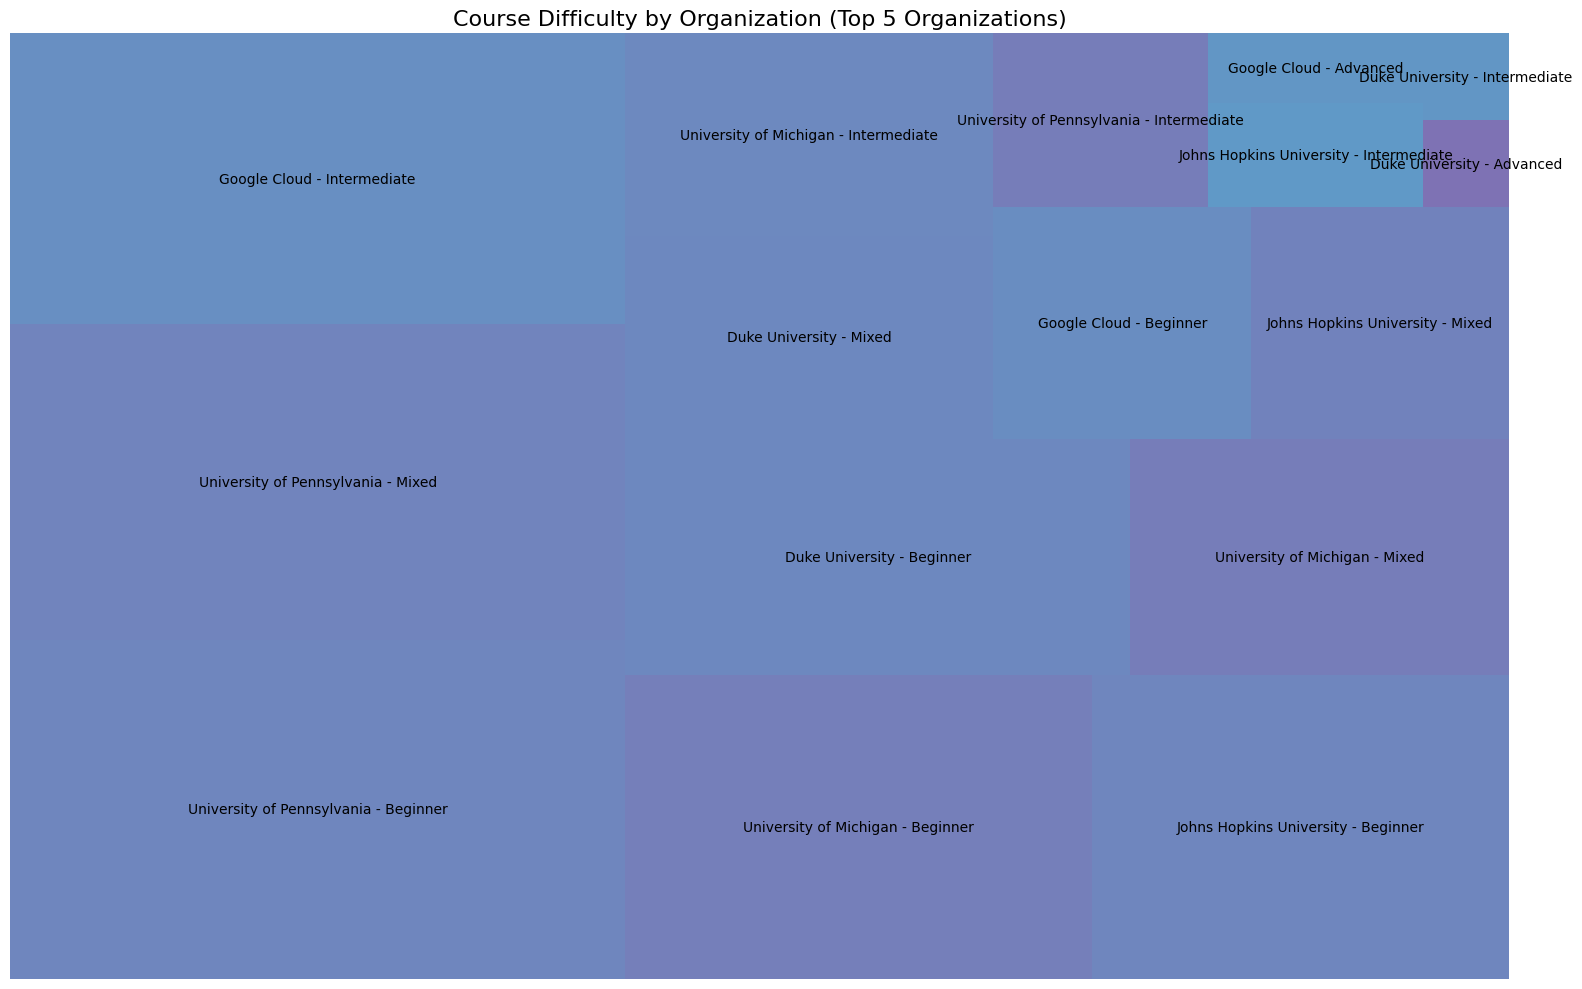

In [185]:
import squarify

# Calculate the average rating for each group
sizes = df_top_5.groupby(["course_organization", "course_difficulty"]).agg(
    count=("course_title", "count"),
    avg_rating=("course_rating", "mean")
).reset_index()

# Sort by count
sizes = sizes.sort_values("count", ascending=False)

# Create the treemap
plt.figure(figsize=(16, 10))
squarify.plot(sizes=sizes["count"], 
              label=sizes["course_organization"] + " - " + sizes["course_difficulty"], 
              alpha=0.8,
              color=plt.cm.Spectral(sizes["avg_rating"]/sizes["avg_rating"].max()))

plt.title("Course Difficulty by Organization (Top 5 Organizations)", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()


**Vertical bar chart** of most popular courses (Top-15)

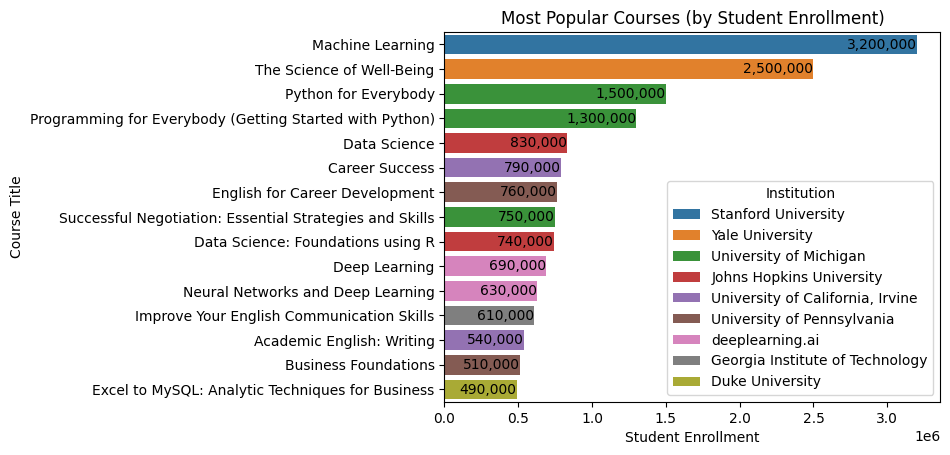

In [225]:
sns.barplot(x='course_students_enrolled', 
            y='course_title', 
            hue='course_organization', 
            data=df.nlargest(15, 'course_students_enrolled'))

for i in range(len(df.nlargest(15, 'course_students_enrolled'))):
    value = df.nlargest(15, 'course_students_enrolled')['course_students_enrolled'].iloc[i]
    formatted_value = f"{int(value):,}"
    plt.annotate(formatted_value,
                 xy=(value, i),
                 ha='right', va='center')

plt.title('Most Popular Courses (by Student Enrollment)')
plt.xlabel('Student Enrollment')
plt.ylabel('Course Title')
plt.legend(title='Institution');
